# Project 2
## Ashish Yonzon, Brenden Latham, Oluwatobi Afolabi
## CPSMA-4413 Numerical Analysis
## Dr. Jacob

In this project we will be using two different methods for approxiating roots of nonlinear equations. We will be using the function as defined below for testing these methods.

### $f(x) = e^{-x}-x $

We will first examine the Newton-Raphson method.

In [ ]:
import pandas as pd
import math

def f(x):
    return math.exp(-x) - x

def df(x):
    return -math.exp(-x) - 1

def newton_raphson(x0, error_tolerance=0.0001, max_iterations=1000):
    x_previous = x0
    results = []
    for i in range(max_iterations):
        fx = f(x_previous)
        dfx = df(x_previous)
        x = x_previous - fx/dfx
        error = abs((x - x_previous)/x)*100
        if error < error_tolerance:
            return results
        x_previous = x
        iteration,x_value,error_obtained = i,x,error
        results.append({ 'Root':x_value, 'Error':error_obtained, 'iteration':i+1})
    return "Error: Maximum number of iterations reached."
  
df = pd.DataFrame(newton_raphson(10))
df
  

,Root,Error,iteration
0,0.000499,2.002397e+06,1
1,0.500125,9.990015e+01,2
2,0.566314,1.168774e+01,3
3,0.567143,1.461786e-01,4


It seems like the Newton-Raphson method yielded a good approximation of the root with few iterations. Let's now see how this compares to the Secant method.

In [ ]:
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt

def derive(x,h):
  d = (f(x)-f(x-h))/h
  return(d)

def g(x,h):
  return(f(x)/derive(x,h))

def secant(x,h,k):
  data = [[1,f(1),"null",0]]
  error = 1
  iterate = 0
  while error > .0001:
    iterate = iterate+1
    if iterate > k:
      break
    else:
      old = x
      x = x-g(x,h)
      error = abs(100*(x-old)/x)
      data.append([x,f(x),error,iterate])
  return data

Now that we have our implementation of the Secant method, because we now need two initial guesses, it will help to have a lagrange approximation of the function to determine good initial guesses.

In [ ]:
def lagrange(x):
  term1 = f(1)*(x-1.1)*(x-1.2)*(x-2)/(1-1.1)/(1-1.2)/(1-2)
  term2 = f(1.1)*(x-1)*(x-1.2)*(x-2)/(1.1-1)/(1.1-1.2)/(1.1-2)
  term3 = f(1.2)*(x-1.1)*(x-1)*(x-2)/(1.2-1.1)/(1.2-1)/(1.2-2)
  term4 = f(2)*(x-1.1)*(x-1.2)*(x-1)/(2-1.1)/(2-1.2)/(2-1)
  return(term1+term2+term3+term4)

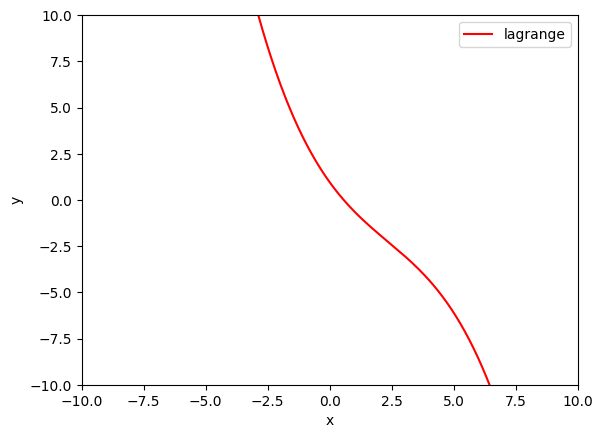

In [ ]:
x = np.linspace(-10, 10, 1000)
y_lagrange = lagrange(x)

plt.plot(x, y_lagrange, label='lagrange',color='red')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

It seems 1 and .5 would be good guesses. Notice that because we are using the secant method, the actual root doesnt need to be between our guesses.

In [ ]:
secant_roots = pd.DataFrame(secant(1,.5,10),columns=["root","f(x)","error","iteration"])
secant_roots

,root,f(x),error,iteration
0,1.000000,-6.321206e-01,null,0
1,0.572112,-7.779083e-03,74.791069,1
2,0.567621,-7.481270e-04,0.791179,2
3,0.567190,-7.263204e-05,0.076002,3
4,0.567148,-7.057865e-06,0.007378,4
5,0.567144,-6.858932e-07,0.000717,5
6,0.567143,-6.665662e-08,0.00007,6


The secant method approaches the same value as the Newton-Raphson method, and from the lagrange interpolation this looks accurate. We have now seen two methods for finding roots of non-linear equations. But why do we care?

Finding roots serves the aim of determining a function's range, which reveals the function's maximum and minimum values as well as the intersection of the graph with the coordinate axes.

The secant method makes use of two beginning points to approximate the root, while the Newton-Raphson method iteratively uses the function's first derivative. Since the Newton-Raphson approach makes use of the function's slope information at each iteration, it often converges more quickly than the secant method. However, a case where the Newton-Raphson method is not appropriate is  when the function has multiple roots that are very close to each other. In this scenario, the method may converge very slowly or not converge at all. In both cases, the inital guess, or guesses, play an extremely important role. It seems that without close inital guesses, the algorithm may never actually converge before the run-time causes extreme problems. This is where the Lagrange Interpolation comes into play.

The Lagrange Interpolation gives us a close approximation for the values of a function on the interval for which our samples lay. This provides us with the ability to make appropriate initial guesses for the roots. 